In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading train, validation and test sets

In [ ]:
ds = tfds.load('malaria', 
               split=('train[:60%]', 'train[60%:80%]', 'train[80%:]'), 
               shuffle_files=False,
              data_dir='/content/gdrive/MyDrive/datasets/Malaria',
               batch_size=32,
              download=True,
              as_supervised=True,
              with_info=False)

# Model optimization

# Manual optimization

In [ ]:
inputs = keras.Input(shape=(None, None, 3))
x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
kernel_size = 2
x = keras.layers.Conv2D(
    filters=256,
    kernel_size=kernel_size,
    strides=(1, 1),
    padding="valid",
    activation='relu')(x)
x = keras.layers.MaxPooling2D(
    pool_size=(2, 2), 
    strides=None, 
    padding="valid")(x)
x = keras.layers.Conv2D(
    filters=512,
    kernel_size=kernel_size,
    strides=(1, 1),
    padding="valid",
    activation='relu')(x)
x = keras.layers.MaxPooling2D(
    pool_size=(2, 2), 
    strides=None, 
    padding="valid")(x)
x = keras.layers.Conv2D(
    filters=1024,
    kernel_size=kernel_size,
    strides=(1, 1),
    padding="valid",
    activation='relu')(x)
x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1024,
                        activation="relu",
                      kernel_regularizer=None)(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 rescaling_2 (Rescaling)     (None, None, None, 3)     0         
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 256)   3328      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 256)  0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 512)   524800    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 512)  0         
 2D)                                                       

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        min_delta=0,
        patience=5,
        verbose=1,
        mode="max",
        baseline=None,
        restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(
        filepath='/content/gdrive/MyDrive/datasets/Malaria/checkpoints/model_{epoch}',
        save_freq='epoch')
    ]

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.7853

517/517 [==============================] - 720s 1s/step - loss: 0.3635 - accuracy: 0.7853 - val_loss: 0.1493 - val_accuracy: 0.9537
Epoch 2/50
517/517 [==============================] - ETA: 0s - loss: 0.1551 - accuracy: 0.9529

517/517 [==============================] - 310s 599ms/step - loss: 0.1551 - accuracy: 0.9529 - val_loss: 0.1574 - val_accuracy: 0.9476
Epoch 3/50
517/517 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9543

517/517 [==============================] - 310s 599ms/step - loss: 0.1492 - accuracy: 0.9543 - val_loss: 0.1537 - val_accuracy: 0.9499
Epoch 4/50
517/517 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9555

517/517 [==============================] - 309s 599ms/step - loss: 0.1434 - accuracy: 0.9555 - val_loss: 0.1535 - val_accuracy: 0.9486
Epoch 5/50
517/517 [==============================] - ETA: 0s - loss: 0.1414 - accuracy: 0.9565

517/517 [==============================] - 309s 598ms/step - loss: 0.1414 - accuracy: 0.9565 - val_loss: 0.1334 - val_accuracy: 0.9557
Epoch 6/50
517/517 [==============================] - ETA: 0s - loss: 0.1367 - accuracy: 0.9578

517/517 [==============================] - 310s 599ms/step - loss: 0.1367 - accuracy: 0.9578 - val_loss: 0.1350 - val_accuracy: 0.9545
Epoch 7/50
517/517 [==============================] - ETA: 0s - loss: 0.1338 - accuracy: 0.9581

517/517 [==============================] - 309s 598ms/step - loss: 0.1338 - accuracy: 0.9581 - val_loss: 0.1317 - val_accuracy: 0.9559
Epoch 8/50
517/517 [==============================] - ETA: 0s - loss: 0.1317 - accuracy: 0.9581

517/517 [==============================] - 309s 598ms/step - loss: 0.1317 - accuracy: 0.9581 - val_loss: 0.1276 - val_accuracy: 0.9561
Epoch 9/50
517/517 [==============================] - ETA: 0s - loss: 0.1282 - accuracy: 0.9598

517/517 [==============================] - 309s 598ms/step - loss: 0.1282 - accuracy: 0.9598 - val_loss: 0.1300 - val_accuracy: 0.9552
Epoch 10/50
517/517 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9600

517/517 [==============================] - 309s 598ms/step - loss: 0.1273 - accuracy: 0.9600 - val_loss: 0.1265 - val_accuracy: 0.9554
Epoch 11/50
517/517 [==============================] - ETA: 0s - loss: 0.1237 - accuracy: 0.9599

517/517 [==============================] - 309s 598ms/step - loss: 0.1237 - accuracy: 0.9599 - val_loss: 0.1252 - val_accuracy: 0.9561
Epoch 12/50
517/517 [==============================] - ETA: 0s - loss: 0.1224 - accuracy: 0.9595

517/517 [==============================] - 308s 597ms/step - loss: 0.1224 - accuracy: 0.9595 - val_loss: 0.1273 - val_accuracy: 0.9545
Epoch 13/50
517/517 [==============================] - ETA: 0s - loss: 0.1190 - accuracy: 0.9609Restoring model weights from the end of the best epoch: 8.


517/517 [==============================] - 308s 597ms/step - loss: 0.1190 - accuracy: 0.9609 - val_loss: 0.1252 - val_accuracy: 0.9559
Epoch 13: early stopping


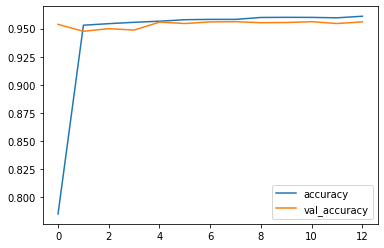

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'],
              'val_accuracy': history.history['val_accuracy']}).plot.line();

In [ ]:
 max(history.history['val_accuracy'])

0.9560878276824951